<a href="https://colab.research.google.com/github/lebe1/text-oriented-data-science-project/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset

## Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder_path = '/content/drive/MyDrive/DOPP_Ex2_data/'

## Imports

In [13]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Reading the CSV File

In [4]:
file_name = 'combined_reviews.csv'

file_path = folder_path + file_name
df = pd.read_csv(file_path)

In [5]:
df.head()

,rating,reviewTime,reviewerID,reviewText,summary,unixReviewTime,category,reviewToken
0,5.0,2017-01-16,ASWLL1VJA7WOG,Great product... just what I wanted. Works gr...,Five Stars,1484524800,All_Beauty,"['great', 'product', 'want', 'works', 'great',..."
1,5.0,2008-12-08,A265K3A7V83112,"After seeing the popularity of this shoe, I de...",What can i say? chucks rock,1228694400,Clothing_Shoes_and_Jewelry,"['see', 'popularity', 'shoe', 'decide', 'test'..."
2,5.0,2013-02-08,A1D18EJF6LHYDV,I was nervousness about the scent because IVe ...,Smells great,1360281600,All_Beauty,"['nervousness', 'scent', 'ive', 'never', 'try'..."
3,5.0,2018-02-15,A25EOTX5I354I2,"I LOVE the smell. A bit expensive, so I cant b...",Five Stars,1518652800,Luxury_Beauty,"['love', 'smell', 'bit', 'expensive', 'buy', '..."
4,5.0,2013-11-11,A1DFZPQPCHBYTY,Found this stuff in Japan and wondered if I co...,Super lathery nice soap!,1384128000,All_Beauty,"['found', 'stuff', 'japan', 'wonder', 'could',..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          12000 non-null  float64
 1   reviewTime      12000 non-null  object 
 2   reviewerID      12000 non-null  object 
 3   reviewText      11975 non-null  object 
 4   summary         11991 non-null  object 
 5   unixReviewTime  12000 non-null  int64  
 6   category        12000 non-null  object 
 7   reviewToken     12000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 750.1+ KB


## Common Words per Category

In [9]:
def get_top_words(tokens_list, top_n=10):
  all_tokens = [word for tokens in tokens_list for word in eval(tokens)]
  return Counter(all_tokens).most_common(top_n)

In [10]:
top_words_per_category = {}

for category, group in df.groupby('category'):
  tokens_list = group['reviewToken'].dropna().tolist()
  top_words = get_top_words(tokens_list, top_n=10)
  top_words_per_category[category] = top_words

for category, words in top_words_per_category.items():
  print(f"Category: {category}")
  print("Top Words:", words)
  print("-" * 50)

Category: All_Beauty
Top Words: [('use', 1287), ('product', 1143), ('love', 1055), ('hair', 902), ('good', 874), ('smell', 765), ('great', 731), ('like', 689), ('get', 531), ('scent', 524)]
--------------------------------------------------
Category: Amazon_Fashion
Top Words: [('shoe', 1953), ('comfortable', 969), ('love', 928), ('fit', 879), ('wear', 701), ('size', 620), ('great', 603), ('foot', 570), ('good', 505), ('like', 438)]
--------------------------------------------------
Category: Clothing_Shoes_and_Jewelry
Top Words: [('fit', 842), ('shoe', 746), ('love', 732), ('wear', 703), ('size', 695), ('great', 686), ('good', 565), ('buy', 476), ('look', 398), ('get', 383)]
--------------------------------------------------
Category: Luxury_Beauty
Top Words: [('use', 2611), ('skin', 2109), ('product', 2101), ('like', 1519), ('good', 1457), ('color', 1265), ('look', 1030), ('feel', 951), ('get', 895), ('hair', 886)]
--------------------------------------------------


## Rating Analysis

In [18]:
# distinct values of rating column
df['rating'].unique()

array([5., 3., 4., 1., 2.])

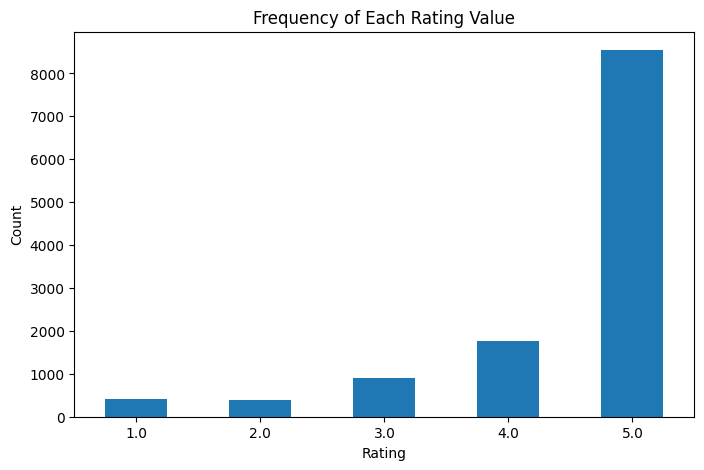

In [19]:
# frequency of each rating

rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar')
plt.title("Frequency of Each Rating Value")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

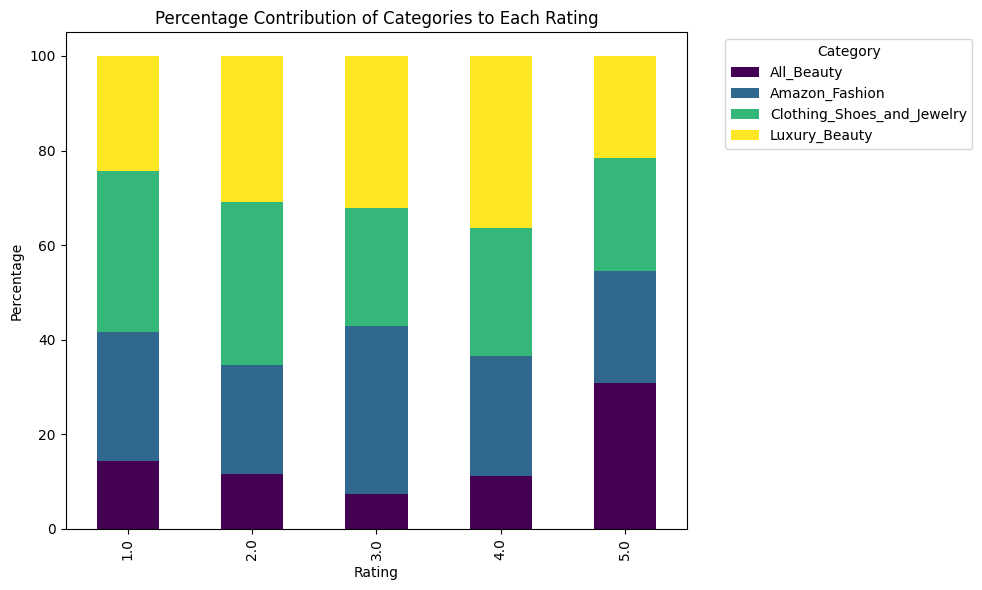

In [20]:
# stacked bar chart - percentage contribution

rating_category_counts = df.groupby(['rating', 'category']).size().unstack(fill_value=0)

rating_category_percent = rating_category_counts.div(rating_category_counts.sum(axis=1), axis=0) * 100

rating_category_percent.plot(
    kind='bar', stacked=True, figsize=(10, 6), colormap='viridis'
)

plt.title("Percentage Contribution of Categories to Each Rating")
plt.xlabel("Rating")
plt.ylabel("Percentage")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

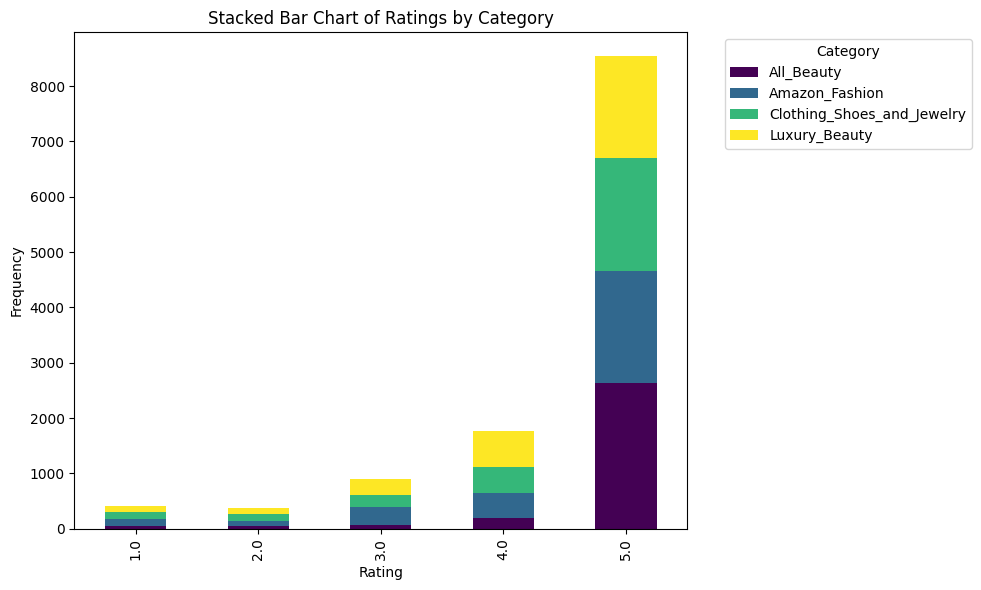

In [21]:
# stacked bar chart - rating frequency

rating_category_counts = df.groupby(['rating', 'category']).size().unstack(fill_value=0)

rating_category_counts.plot(
    kind='bar', stacked=True, figsize=(10, 6), colormap='viridis'
)

plt.title("Stacked Bar Chart of Ratings by Category")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Average Rating per Category

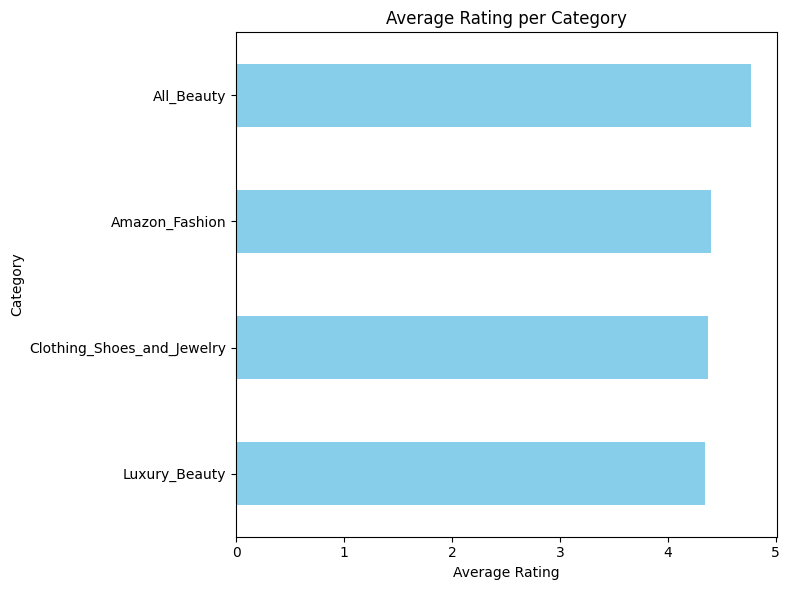

In [23]:
avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values()

plt.figure(figsize=(8, 6))
avg_rating_per_category.plot(kind='barh', color='skyblue')

plt.title("Average Rating per Category")
plt.xlabel("Average Rating")
plt.ylabel("Category")

plt.tight_layout()
plt.show()

## Top Words by Rating

In [25]:
def get_top_words_per_rating(df, token_column, rating_column, top_n=10):
  top_words_per_rating = {}
  for rating in sorted(df[rating_column].unique()):
      tokens_list = df[df[rating_column] == rating][token_column].dropna().tolist()
      all_tokens = [word for tokens in tokens_list for word in eval(tokens)]
      top_words = Counter(all_tokens).most_common(top_n)
      top_words_per_rating[rating] = top_words
  return top_words_per_rating

def generate_wordclouds_per_rating(top_words_per_rating):
  for rating, word_freq in top_words_per_rating.items():
      print(f"Generating Wordcloud for Rating {rating}")
      wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
      plt.figure(figsize=(8, 4))
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.title(f"Top Words for Rating {rating}")
      plt.axis('off')
      plt.show()

Generating Wordcloud for Rating 1.0


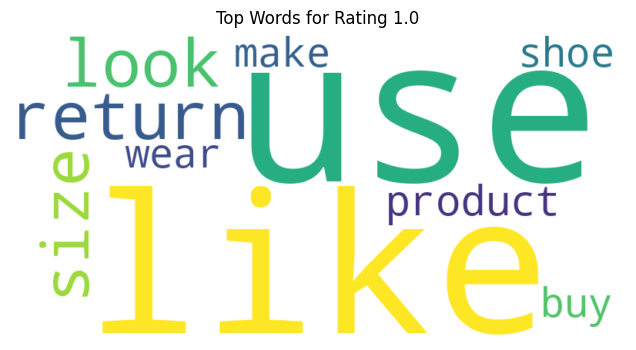

Generating Wordcloud for Rating 2.0


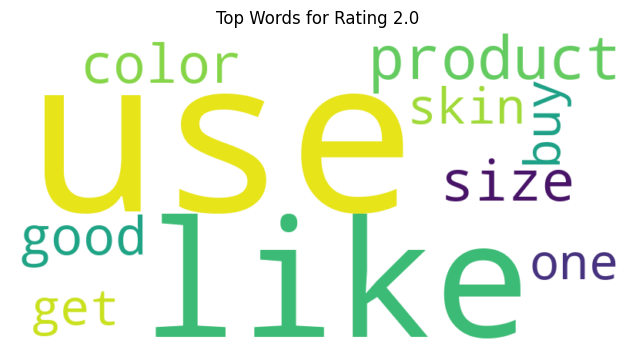

Generating Wordcloud for Rating 3.0


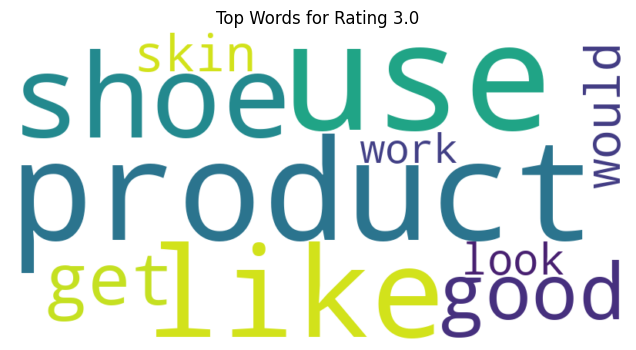

Generating Wordcloud for Rating 4.0


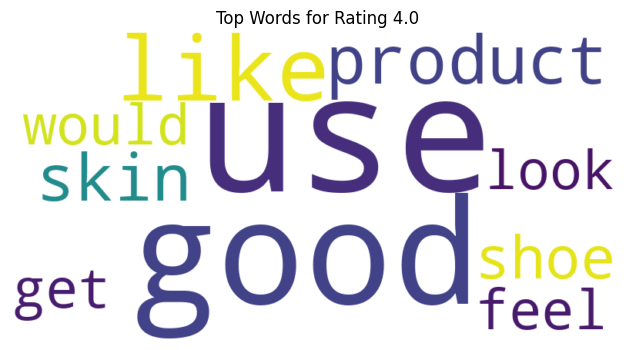

Generating Wordcloud for Rating 5.0


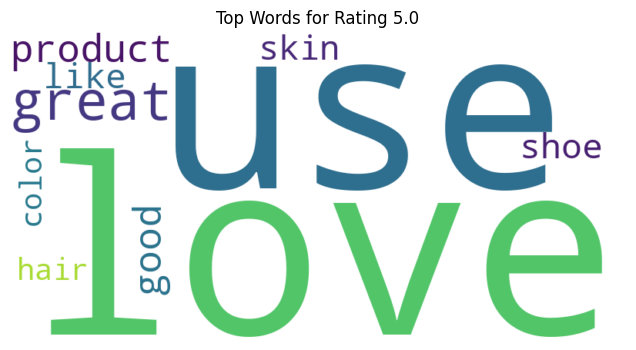

In [26]:
top_words_per_rating = get_top_words_per_rating(df, token_column='reviewToken', rating_column='rating', top_n=10)

generate_wordclouds_per_rating(top_words_per_rating)

## Review Length by Rating

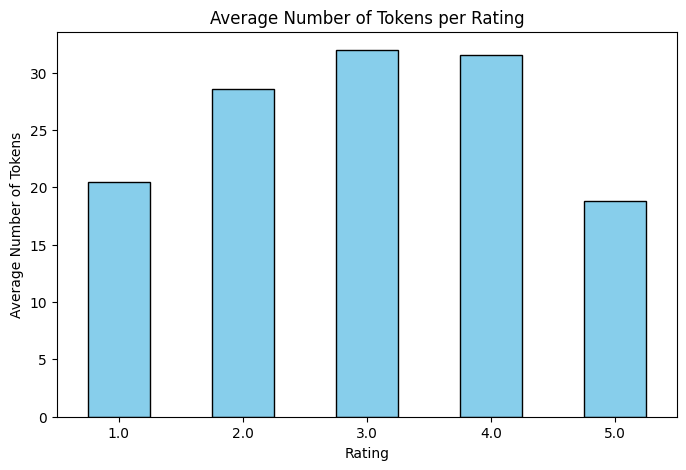

In [27]:
def compute_avg_tokens_per_rating(df, token_column, rating_column):
  df['token_length'] = df[token_column].dropna().apply(lambda x: len(eval(x)))
  avg_tokens = df.groupby(rating_column)['token_length'].mean()
  return avg_tokens

avg_tokens_per_rating = compute_avg_tokens_per_rating(df, 'reviewToken', 'rating')

plt.figure(figsize=(8, 5))
avg_tokens_per_rating.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Number of Tokens per Rating")
plt.xlabel("Rating")
plt.ylabel("Average Number of Tokens")
plt.xticks(rotation=0)
plt.show()

## Time-Based Analysis

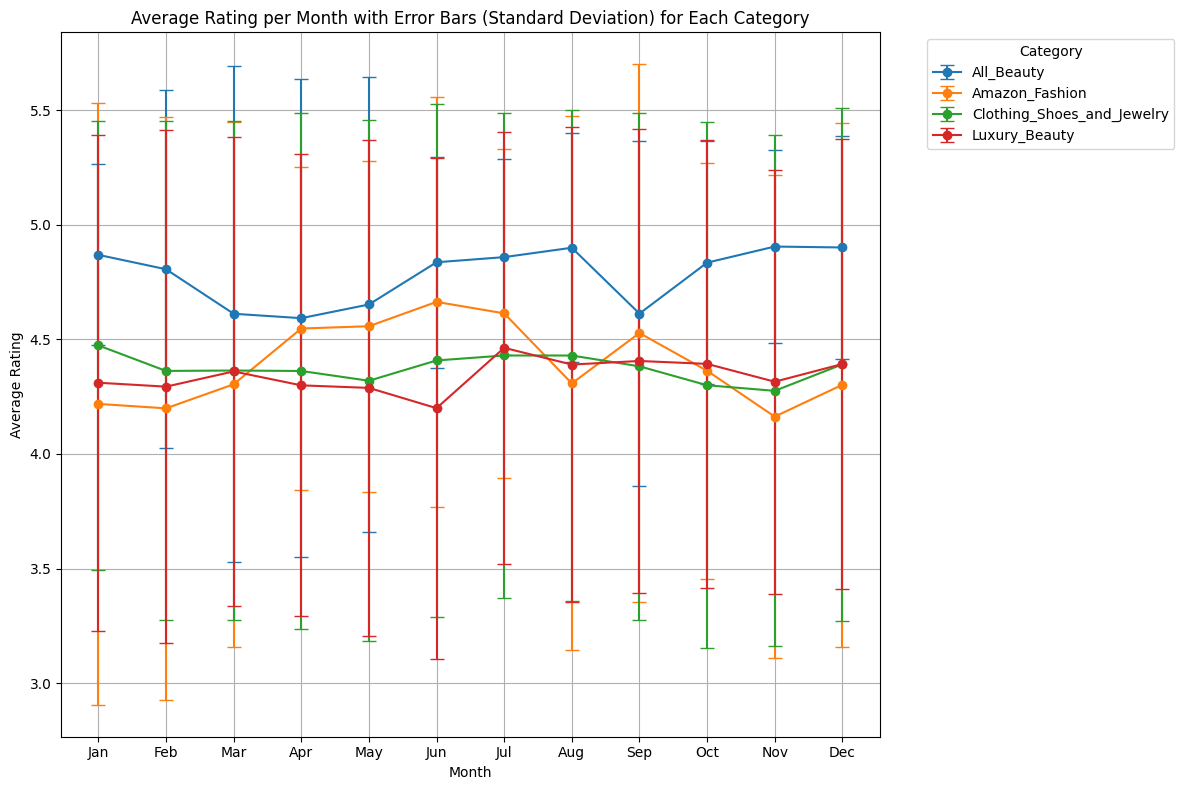

In [31]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

df['month'] = df['reviewTime'].dt.month

monthly_stats = df.groupby(['month', 'category'])['rating'].agg(['mean', 'std']).unstack()

plt.figure(figsize=(12, 8))
for category in monthly_stats['mean'].columns:
    mean_values = monthly_stats['mean'][category]
    std_values = monthly_stats['std'][category]

    plt.errorbar(mean_values.index, mean_values, yerr=std_values, capsize=5, fmt='-o', label=category)

plt.title("Average Rating per Month with Error Bars (Standard Deviation) for Each Category")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
